## The Three Body Problem

The solution to the three body problem for gravitational attraction is done using the leapfrog method and ivp solver. 

- Solve for the orbital motion of the three bodies. 
- Set the mass ratio between the two bodies to something greater than 1 to show how the orbits reduce to those presented in class. 
- Animate the orbit
- Show that the leapfrog method conserves energy while the ivp solver do not.  

## The Equations of motion for N-bodies

We define $\vec{r_i} = x_i\hat{x}+y_i\hat{y}$, where $i = 1,2,3,...$ for each mass in the system. The mutual attraction of two bodies, $m_i$ and $m_j$, is given by Newton's Law of Gravity, $F_{grav} = \frac{G m_i m_j}{r^2}$, where $r = \sqrt{(x_i - x_j)^2 + (y_i - y_j)^2}$ and is the magnitude of the distance between the two bodies. We use Newton's 2nd Law $\vec{F} = m\vec{\ddot{r}}$ to derive the equations of motion. The equations of motion in cartesian coordinates $(x,y)$ are,  

$\ddot{x_i} = \sum_{j=1}^{N} \frac{G m_j}{[(x_i - x_j)^2 + (y_i - y_j)^2]^\frac{3}{2}} (x_j - x_i)$ 

$\ddot{y_i} = \sum_{j=1}^{N} \frac{G m_j}{[(x_i - x_j)^2 + (y_i - y_j)^2]^\frac{3}{2}} (y_j - y_i)$


In [5]:
%matplotlib inline

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp


from matplotlib import animation, rc
from IPython.display import HTML

In [7]:
# Change the common font size
font_size = 14
plt.rcParams.update({'font.size': font_size})

## Initialize the Orbit class 

In [173]:
class Orbit:
    """
    Solves the two body differential equations
    """
    
    def __init__(self, M1=1, M2=1, M3 = 1, G=1):
        self.M1 = M1
        self.M2 = M2
        self.M3 = M3
        self.G = G
        
    def dy_dt(self, t, y):
        """
        This function returns the right-hand side of the diffeq: 
        
        Parameters
        ----------
        t : float
            time 
        y : float
            12-component vector with y[0] = x1(t), y[1] = dx1(t)/dt, 
            y[2] = y1(t), y[3] = dy1(t)/dt, y[4] = x2(t), y[5] = dx2(t)/dt, 
            y[6] = y2(t), y[7] = dy2(t)/dt, y[8] = x3(t), y[9] = dx3(t)/dt, 
            y[10] = y3(t), y[11] = dy3(t)/dt, 
            
        dy : float to be returned. dy/dt of the y vector.
        """
        r2_1_2 = (y[4]-y[0])**2 + (y[6]-y[2])**2 # r^2 for bodies 1 and 2
        r2_1_3 = (y[8]-y[0])**2 + (y[10]-y[2])**2 # r^2 for bodies 1 and 3
        r2_2_3 = (y[8]-y[4])**2 + (y[10]-y[6])**2 # r^2 for bodies 2 and 3
        return [ y[1], 
                self.G*self.M2*(y[4]-y[0])/(r2_1_2)**(3/2)+self.G*self.M3*(y[8]-y[0])/(r2_1_3)**(3/2),
                y[3], 
                self.G*self.M2*(y[6]-y[2])/(r2_1_2)**(3/2)+self.G*self.M3*(y[10]-y[2])/(r2_1_3)**(3/2),
                y[5], 
                self.G*self.M1*(y[0]-y[4])/(r2_1_2)**(3/2)+self.G*self.M3*(y[8]-y[4])/(r2_2_3)**(3/2),
                y[7], 
                self.G*self.M1*(y[2]-y[6])/(r2_1_2)**(3/2)+self.G*self.M3*(y[10]-y[6])/(r2_2_3)**(3/2),
                y[9], 
                self.G*self.M1*(y[0]-y[8])/(r2_1_3)**(3/2)+self.G*self.M2*(y[4]-y[8])/(r2_2_3)**(3/2),
                y[11], 
                self.G*self.M1*(y[2]-y[10])/(r2_1_3)**(3/2)+self.G*self.M2*(y[6]-y[10])/(r2_2_3)**(3/2),
               ]
    
    
        
    def solve_ode_Leapfrog(self, t_pts, x1_0, x1_dot_0, y1_0, y1_dot_0, x2_0, x2_dot_0, y2_0, y2_dot_0, x3_0, x3_dot_0, y3_0, y3_dot_0):
        """
        Solve the ODE given initial conditions with the Leapfrog method.
        """
        delta_t = t_pts[1] - t_pts[0]
        
        # initialize the arrays for qi, qi_dot, qi_dot_half with zeros
        # qi = x1,x2,y1,y2
        num_t_pts = len(t_pts)
        x1 = np.zeros(num_t_pts)
        x1_dot = np.zeros(num_t_pts)
        x1_dot_half = np.zeros(num_t_pts)
        
        y1 = np.zeros(num_t_pts)
        y1_dot = np.zeros(num_t_pts)
        y1_dot_half = np.zeros(num_t_pts)
        
        x2 = np.zeros(num_t_pts)
        x2_dot = np.zeros(num_t_pts)
        x2_dot_half = np.zeros(num_t_pts)
        
        y2 = np.zeros(num_t_pts)
        y2_dot = np.zeros(num_t_pts)
        y2_dot_half = np.zeros(num_t_pts)
        
        x3 = np.zeros(num_t_pts)
        x3_dot = np.zeros(num_t_pts)
        x3_dot_half = np.zeros(num_t_pts)
        
        y3 = np.zeros(num_t_pts)
        y3_dot = np.zeros(num_t_pts)
        y3_dot_half = np.zeros(num_t_pts)
        
        # initial conditions
        x1[0] = x1_0
        x1_dot[0] = x1_dot_0
        y1[0] = y1_0
        y1_dot[0] = y1_dot_0
        x2[0] = x2_0
        x2_dot[0] = x2_dot_0
        y2[0] = y2_0
        y2_dot[0] = y2_dot_0
        x3[0] = x3_0
        x3_dot[0] = x3_dot_0
        y3[0] = y3_0
        y3_dot[0] = y3_dot_0
        
        
        # step through the differential equations
        for i in np.arange(num_t_pts - 1):
            
            t = t_pts[i]
            y = [x1[i], x1_dot[i], y1[i], y1_dot[i], x2[i], x2_dot[i], y2[i], y2_dot[i], x3[i], x3_dot[i], y3[i], y3_dot[i]]
            
            x1_dot_half[i] = x1_dot[i] + self.dy_dt(t, y)[1] * delta_t/2.
            x1[i+1] = x1[i] + x1_dot_half[i] * delta_t
            
            y1_dot_half[i] = y1_dot[i] + self.dy_dt(t, y)[3] * delta_t/2.
            y1[i+1] = y1[i] + y1_dot_half[i] * delta_t
            
            x2_dot_half[i] = x2_dot[i] + self.dy_dt(t, y)[5] * delta_t/2.
            x2[i+1] = x2[i] + x2_dot_half[i] * delta_t
            
            y2_dot_half[i] = y2_dot[i] + self.dy_dt(t, y)[7] * delta_t/2.
            y2[i+1] = y2[i] + y2_dot_half[i] * delta_t
            
            x3_dot_half[i] = x3_dot[i] + self.dy_dt(t, y)[9] * delta_t/2.
            x3[i+1] = x3[i] + x3_dot_half[i] * delta_t
            
            y3_dot_half[i] = y3_dot[i] + self.dy_dt(t, y)[11] * delta_t/2.
            y3[i+1] = y3[i] + y3_dot_half[i] * delta_t
            
            y = [x1[i+1], x1_dot[i], y1[i+1], y1_dot[i], x2[i+1], x2_dot[i], y2[i+1], y2_dot[i], x3[i+1], x3_dot[i], y3[i+1], y3_dot[i]]
            
            x1_dot[i+1] = x1_dot_half[i] + self.dy_dt(t, y)[1] * delta_t/2.
            y1_dot[i+1] = y1_dot_half[i] + self.dy_dt(t, y)[3] * delta_t/2.
            x2_dot[i+1] = x2_dot_half[i] + self.dy_dt(t, y)[5] * delta_t/2.
            y2_dot[i+1] = y2_dot_half[i] + self.dy_dt(t, y)[7] * delta_t/2.
            x3_dot[i+1] = x3_dot_half[i] + self.dy_dt(t, y)[9] * delta_t/2.
            y3_dot[i+1] = y3_dot_half[i] + self.dy_dt(t, y)[11] * delta_t/2.

            
        return x1, x1_dot, y1, y1_dot, x2, x2_dot, y2, y2_dot, x3, x3_dot, y3, y3_dot    
    
    
    def solve_ivp(self, t_pts,  x1_0, x1_dot_0, y1_0, y1_dot_0, x2_0, x2_dot_0, y2_0, y2_dot_0, x3_0, x3_dot_0, y3_0, y3_dot_0,
                  method='RK23',
                  abserr=1.0e-8, relerr=1.0e-8):
        """
        Solve the ODE given initial conditions.
        Use solve_ivp with the option of specifying the method.
        Specify smaller abserr and relerr to get more precision.
        """
        y = [x1_0, x1_dot_0, y1_0, y1_dot_0, x2_0, x2_dot_0, y2_0, y2_dot_0, x3_0, x3_dot_0, y3_0, y3_dot_0] 
        solution = solve_ivp(self.dy_dt, (t_pts[0], t_pts[-1]), 
                             y, t_eval=t_pts, method=method, 
                             atol=abserr, rtol=relerr)
        x1, x1_dot, y1, y1_dot, x2, x2_dot, y2, y2_dot,x3, x3_dot, y3, y3_dot   = solution.y
        return x1, x1_dot, y1, y1_dot, x2, x2_dot, y2, y2_dot, x3, x3_dot, y3, y3_dot   
    
    def U(self, x1, y1, x2, y2, x3, y3):
        """Calculate the potential energy in the system"""
        r2_1_2 = (x1-x2)**2 + (y1-y2)**2 # r^2 for bodies 1 and 2
        r2_1_3 = (x1-x3)**2 + (y1-y3)**2 # r^2 for bodies 1 and 3
        r2_2_3 = (x2-x3)**2 + (y2-y3)**2 # r^2 for bodies 2 and 3
        return -self.G*self.M1*self.M2/(r2_1_2)-self.G*self.M1*self.M3/(r2_1_3)-self.G*self.M2*self.M3/(r2_2_3)
    
    def energy(self, x1, x1_dot, y1, y1_dot, x2, x2_dot, y2, y2_dot,x3, x3_dot, y3, y3_dot  ):
        """Evaluate the energy as a function of time"""
        return (self.M1/2.) * (x1_dot**2 + y1_dot**2) +(self.M2/2.) * (x2_dot**2 + y2_dot**2) + (self.M3/2.) * (x3_dot**2 + y3_dot**2)+self.U(x1,y1,x2,y2,x3,y3)

In [164]:
def start_stop_indices(t_pts, plot_start, plot_stop):
    start_index = (np.fabs(t_pts-plot_start)).argmin()  # index in t_pts array 
    stop_index = (np.fabs(t_pts-plot_stop)).argmin()  # index in t_pts array 
    return start_index, stop_index

In [165]:
M1 = 50.
M2 = 1.
M3 = 1.
G = 1.
o1 = Orbit(M1 = M1, M2 = M2, M3 = M3, G = G)

x2_0 = 3.1
x2_dot_0 = 0.
y2_0 = 0.
y2_dot_0 = 3.

x3_0 = -3
x3_dot_0 = 0
y3_0 = 0.
y3_dot_0 = -3

x1_0 = 0.
x1_dot_0 = -(x2_dot_0*M2+x3_dot_0*M3)/M1
y1_0 = 0.
y1_dot_0 = -(y2_dot_0*M2+y3_dot_0*M3)/M1


t_start = 0.
t_end = 20.
delta_t = 0.01
t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

x1, x1_dot, y1, y1_dot, x2, x2_dot, y2, y2_dot, x3, x3_dot, y3, y3_dot = o1.solve_ode_Leapfrog(t_pts, x1_0, x1_dot_0, y1_0, y1_dot_0, x2_0, x2_dot_0, y2_0, y2_dot_0,x3_0, x3_dot_0, y3_0, y3_dot_0)

# Solve using other methods for energy plots later on.
x1_ivp, x1_dot_ivp, y1_ivp, y1_dot_ivp, x2_ivp, x2_dot_ivp, y2_ivp, y2_dot_ivp, x3_ivp, x3_dot_ivp, y3_ivp, y3_dot_ivp = o1.solve_ivp(t_pts, x1_0, x1_dot_0, y1_0, y1_dot_0, x2_0, x2_dot_0, y2_0, y2_dot_0,x3_0, x3_dot_0, y3_0, y3_dot_0)


(-5, 5)

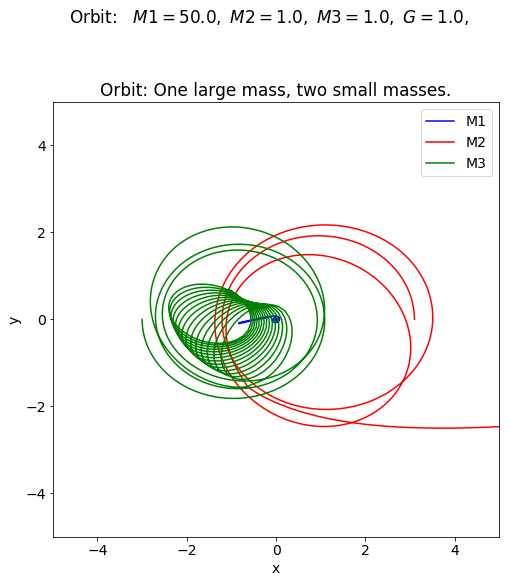

In [166]:
fig = plt.figure(figsize=(8,8))

overall_title = 'Orbit:  ' + \
                rf' $M1 = {o1.M1},$' + \
                rf' $M2 = {o1.M2},$' + \
                rf' $M3 = {o1.M3},$' + \
                rf' $G = {o1.G},$' + \
                '\n'     # \n means a new line (adds some space here)
fig.suptitle(overall_title, va='baseline')

ax_4a = fig.add_subplot(1,1,1)
ax_4a.plot(x1, y1, color='blue', label='M1')
ax_4a.plot(x2, y2, color='red', label='M2')
ax_4a.plot(x3, y3, color='green', label='M3')
#ax_4a.plot(t_pts, r_pts_Euler, color='blue', label='Euler')
#ax_4a.plot(t_pts, r_pts_LF, color='red', label='Leapfrog')
ax_4a.set_xlabel('x')
ax_4a.set_ylabel('y')
ax_4a.set_title('Orbit: One large mass, two small masses.')
ax_4a.legend()
ax_4a.set_ylim(-5,5)
ax_4a.set_xlim(-5,5)

Not so stable, but I want to animate this system to watch the time evolution.

## Time to animate!

In [167]:
%%capture

x_min = min([min(x1),min(x2),min(x3)]) 
y_min = min([min(y1),min(y2),max(x3)]) 
x_max = max([max(x1),max(x2),min(x3)]) 
y_max = max([max(y1),max(y2),max(x3)]) 

gap = 5
fig_anim = plt.figure(figsize=(10,10), num='Orbit: large mass, small mass')
ax_anim = fig_anim.add_subplot(1,1,1)
ax_anim.set_xlim(x_min-gap, x_max+gap)
ax_anim.set_ylim(y_min-gap, y_max+gap)

# By assigning the first return from plot to line_anim, we can later change
#  the values in the line.
line_anim1, = ax_anim.plot(x1[0], y1[0], 'o', markersize=10, color='blue',)
line_anim2, = ax_anim.plot(x2[0], y2[0],  'o', markersize=10, color='red')
line_anim3, = ax_anim.plot(x3[0], y3[0],  'o', markersize=10, color='green')

fig_anim.tight_layout()

In [168]:
def animate_wave(i):
    """This is the function called by FuncAnimation to create each frame,
        numbered by i.  So each i corresponds to a point in the t_pts
        array, with index i. 
        """

    line_anim1.set_data(x1[i], y1[i])  # overwrite line_anim with new points
    line_anim2.set_data(x2[i], y2[i])  # overwrite line_anim with new points
    line_anim3.set_data(x3[i], y3[i])  # overwrite line_anim with new points
    return (line_anim1, line_anim2, line_anim3)   # this is needed for blit=True to work

In [169]:
frame_interval = 1.  # time between frames
frame_number = 1000 # number of frames to include (index of t_pts)
anim = animation.FuncAnimation(fig_anim, 
                               animate_wave, 
                               init_func=None,
                               frames=frame_number, 
                               interval=frame_interval, 
                               blit=True,
                               repeat=False)

#fig.show()

In [170]:
HTML(anim.to_jshtml())

## Lets now compare energy over time for different methods.

In [171]:
E_0 = o1.energy(x1_0, x1_dot_0, y1_0, y1_dot_0, x2_0, x2_dot_0, y2_0, y2_dot_0, x3_0, x3_dot_0, y3_0, y3_dot_0)
E_lf = o1.energy(x1, x1_dot, y1, y1_dot, x2, x2_dot, y2, y2_dot, x3, x3_dot, y3, y3_dot)
E_ivp = o1.energy(x1_ivp, x1_dot_ivp, y1_ivp, y1_dot_ivp, x2_ivp, x2_dot_ivp, y2_ivp, y2_dot_ivp, x3_ivp, x3_dot_ivp, y3_ivp, y3_dot_ivp ) 


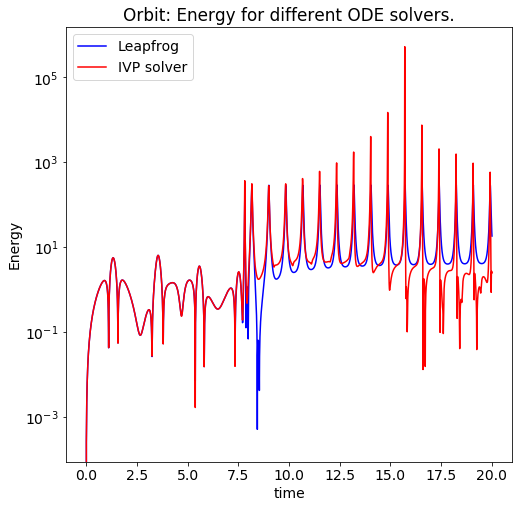

In [172]:
fig_E = plt.figure(figsize=(8,8))

overall_title = 'Orbit Energy:  ' + \
                rf' $M1 = {o1.M1},$' + \
                rf' $M2 = {o1.M2},$' + \
                rf' $G = {o1.G},$' + \
                '\n'     # \n means a new line (adds some space here)
fig.suptitle(overall_title, va='baseline')

ax_4a = fig_E.add_subplot(1,1,1)
ax_4a.semilogy(t_pts, np.abs((E_lf-E_0)/E_0), color='blue', label='Leapfrog')
ax_4a.semilogy(t_pts, np.abs((E_ivp-E_0)/E_0), color='red', label='IVP solver')
#ax_4a.plot(x2, y2, color='red', label='M2')
#ax_4a.plot(t_pts, r_pts_Euler, color='blue', label='Euler')
#ax_4a.plot(t_pts, r_pts_LF, color='red', label='Leapfrog')
ax_4a.set_xlabel('time')
ax_4a.set_ylabel('Energy')
ax_4a.set_title('Orbit: Energy for different ODE solvers.')
ax_4a.legend()